# Aviation Accident Risk Analysis Project

## Project Goal
My project aims to analyze aviation accident data to determine the lowest-risk aircraft for a business considering entering the aviation industry.

## Data Source and Exploration
This [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses), sourced from the **National Transportation Safety Board (NTSB)**, contains aviation accident records from **1962 to 2023**

The objective is to analyze key patterns and determine aircraft models with the lowest risk.

The dataset includes details on:
- Aircraft type
- Accident causes
- Locations
- Other contributing factors

The target analysis focuses on identifying patterns in aviation accidents, including:
- The most common aircraft involved in accidents
- The leading cause of aviation accidents
- Trends overtime and geographical distribution
- The correlation between accident severity and aircraft type

I cleaned, analyzed and visualized the data using **Pandas**, **Tableau**, and **Interactive dashboards** to derive insights.

## Key Findings
The analysis revealed:
- Certain aircraft models have significantly lower accident rates than others.
- **Human error** is a leading cause of aviation accidents, followed by **mechanical failure**.
- **Weather conditions** play a crucial role in accidents severity
  
These insights provide valuable recommendations for selecting **low-risk aircraft** and improving **aviation safety strategies**

**Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv file**

In [2]:
df = pd.read_csv('AviationData.csv', encoding='latin1')

# Using 'latin-1' encoding to handle special characters and avoid UnicodeDecodeError.
# that cause issues with the default 'utf-8' encoding.

C:\Users\gichu\AppData\Local\Temp\ipykernel_41208\1236833942.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


### Understanding the Dataset Structure

Here I am getting an overview of the dataset. I'll use:

1. **`df.info()`** - Provides a summary of the dataset
2. **`df.head()`** - Displays the first five rows of the dataset

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


**Generating summary statisctics for the numerical columns in the dataset** using **`df.describe()`**

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Cleaning

**Check for duplicates**

In [5]:
df[df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


According to the above:
*No duplicates have been found in the dataset*

**Check for null values**

In [6]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

**A quick visualization of the missing values using a bar graph**

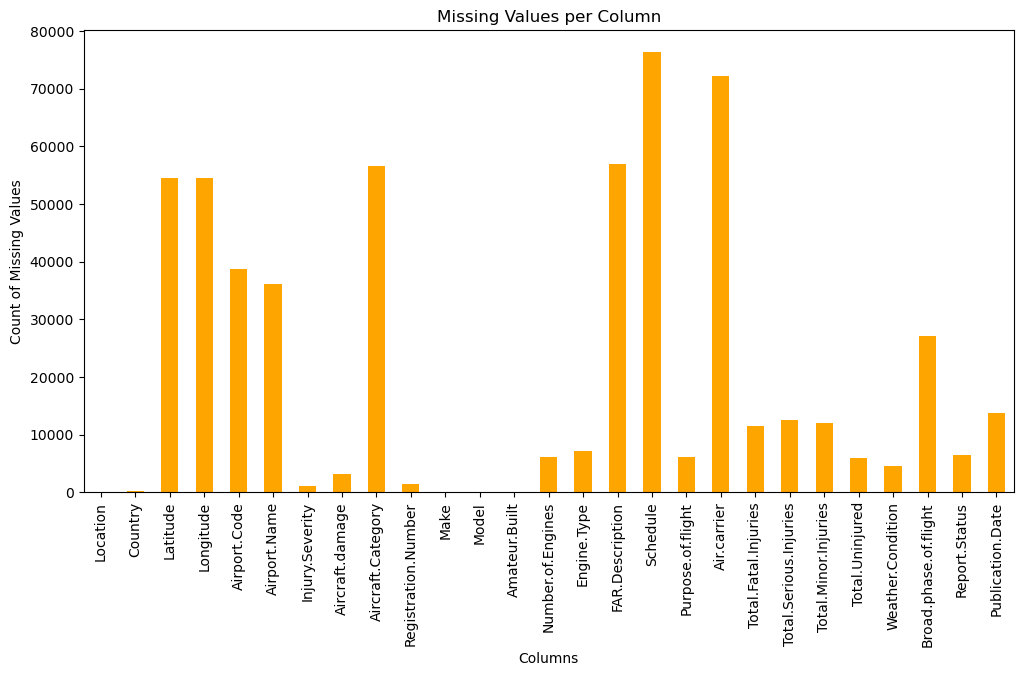

In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] 

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='orange')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Using a heat map to see missing values**

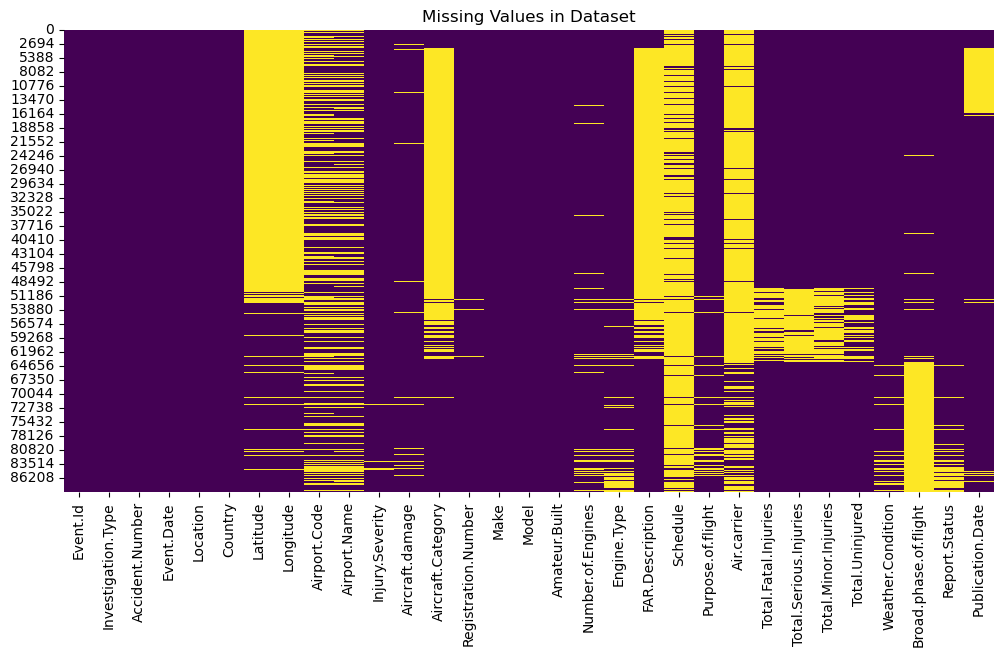

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

## Handling Missing Values
### Handling too many missing values

**Drop columns with too many missing values**

As per the analysis above, there are many columns with a lot of missing values

Not all columns in the dataset contribute to understanding aircraft safety and risk.  
Here, I'll remove columns that are "not useful" for our analysis e.g, columns with excessive missing values::

In [12]:
# first I print out the actual column names
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


As per the result above, not all column names are being displayed maybe due to trailing spaces or special characters that are not immediately visible.

In [13]:
# Remove trailing spaces and replace them with underscores
df.columns = df.columns.str.strip()  
df.columns = df.columns.str.replace(" ", "_")  

In [14]:
# Check the actual column names again
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


Now all the column names are being correctly displayed.

The columns with too many misisng values will now be dropped

In [15]:
# This function helps to see just how much missing data each column has 
# It checks the percentage of missing data for each column

def missing_data_summary(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})
    missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)
    return missing_df

missing_summary = missing_data_summary(df)
print(missing_summary)


                                        Column  Missing Percentage
Schedule                              Schedule           85.845268
Air.carrier                        Air.carrier           81.271023
FAR.Description                FAR.Description           63.974170
Aircraft.Category            Aircraft.Category           63.677170
Longitude                            Longitude           61.330423
Latitude                              Latitude           61.320298
Airport.Code                      Airport.Code           43.601570
Airport.Name                      Airport.Name           40.708074
Broad.phase.of.flight    Broad.phase.of.flight           30.560587
Publication.Date              Publication.Date           15.492356
Total.Serious.Injuries  Total.Serious.Injuries           14.073732
Total.Minor.Injuries      Total.Minor.Injuries           13.424608
Total.Fatal.Injuries      Total.Fatal.Injuries           12.826109
Engine.Type                        Engine.Type            7.98

In [16]:
# Drop columns, starting with ones with more than 50% of missing data
columns_to_drop = ['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# dropping airport code and airport name as well

**Check if the columns have been dropped**

In [17]:
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')


In [18]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

### Handling Missing Values in Numerical Columns
Filling Missing Numerical Values with Mean

Before filling missing values, I'll calculate the mean of each numerical column.

In [19]:
# Calculating mean for numerical columns
fatal_injuries_mean = df['Total.Fatal.Injuries'].mean()
serious_injuries_mean = df['Total.Serious.Injuries'].mean()
minor_injuries_mean = df['Total.Minor.Injuries'].mean()
uninjured_mean = df['Total.Uninjured'].mean()

print(f"Mean Fatal Injuries: {fatal_injuries_mean}")
print(f"Mean Serious Injuries: {serious_injuries_mean}")
print(f"Mean Minor Injuries: {minor_injuries_mean}")
print(f"Mean Uninjured: {uninjured_mean}")


Mean Fatal Injuries: 0.6478551517654346
Mean Serious Injuries: 0.27988059545162935
Mean Minor Injuries: 0.3570611778158948
Mean Uninjured: 5.325439579642552


#### Replace Missing Numerical Values
I will now fill the missing values using the computed mean

In [20]:
# Replacing missing values with computed mean
df['Total.Fatal.Injuries'].fillna(fatal_injuries_mean, inplace=True)
df['Total.Serious.Injuries'].fillna(serious_injuries_mean, inplace=True)
df['Total.Minor.Injuries'].fillna(minor_injuries_mean, inplace=True)
df['Total.Uninjured'].fillna(uninjured_mean, inplace=True)

print(df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].isnull().sum())


Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64


### Handling Missing Values in Categorical Columns
Filling Missing Categorical Values with Mode

Before filling missing values, I'll calculate the mode of each categorical column.

In [21]:
#mode for categorical columns
categorical_cols = ['Country', 'Broad.phase.of.flight', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 
                    'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
                    'Purpose.of.flight', 'Weather.Condition', 'Report.Status']

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    print(f"Mode for {col}: {mode_value}")


Mode for Country: United States
Mode for Broad.phase.of.flight: Landing
Mode for Injury.Severity: Non-Fatal
Mode for Aircraft.damage: Substantial
Mode for Make: Cessna
Mode for Model: 152
Mode for Amateur.Built: No
Mode for Number.of.Engines: 1.0
Mode for Engine.Type: Reciprocating
Mode for Purpose.of.flight: Personal
Mode for Weather.Condition: VMC
Mode for Report.Status: Probable Cause


#### Replace Missing Categorical Values
I will now fill the missing values using the computed mode

In [46]:
# Replacing missing values with computed mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)  

# Verify if values are filled
print(df[categorical_cols].isnull().sum())

Country                  0
Broad.phase.of.flight    0
Injury.Severity          0
Aircraft.damage          0
Make                     0
Model                    0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Report.Status            0
dtype: int64


In [23]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1382
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

**Fill missing location values with 'unknown location'**

In [24]:
df['Location'].fillna('Unknown Location', inplace=True)

**Fill missing registration number values with 'unknown'**

In [25]:
df['Registration.Number'].fillna('Unknown', inplace=True)

<!-- **Fill missing publication date values with 'Not Published'** -->

In [26]:
# df['Publication.Date'].fillna('Not Published', inplace=True)

In [27]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13771
dtype: int64

*There are no longer missing values in the dataset*

### Data Type Validation and Conversion

In [28]:
# Check data types
print(df.dtypes)

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status              object
Publication.Date           object
dtype: object


In [30]:
# Convert Event.Date and Publication.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

In [31]:
# confirming if event and publication date are now type datetime
print(df[['Event.Date', 'Publication.Date']].dtypes)

Event.Date          datetime64[ns]
Publication.Date    datetime64[ns]
dtype: object


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Injury.Severity         88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Registration.Number     88889 non-null  object        
 9   Make                    88889 non-null  object        
 10  Model                   88889 non-null  object        
 11  Amateur.Built           88889 non-null  object        
 12  Number.of.Engines       88889 non-null  float6

### FEATURE ENGINEERING

I will now generate new features that might be useful for analysis

1. **Create a Total Injuries Column**

In [33]:
df['Total.Injuries'] = (
    df['Total.Fatal.Injuries'] + 
    df['Total.Serious.Injuries'] + 
    df['Total.Minor.Injuries']
)


In [34]:
print('Total.Injuries' in df.columns)

True


In [35]:
print(df['Total.Injuries'].head())


0    2.000000
1    4.000000
2    3.636942
3    2.000000
4    3.357061
Name: Total.Injuries, dtype: float64


2. **Classifying accidents as fatal or non-fatal**

In [36]:
df['Fatal_Accident'] = df['Total.Fatal.Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')


In [37]:
print(df[['Total.Fatal.Injuries', 'Fatal_Accident']].head())

   Total.Fatal.Injuries Fatal_Accident
0                   2.0          Fatal
1                   4.0          Fatal
2                   3.0          Fatal
3                   2.0          Fatal
4                   1.0          Fatal


In [38]:
# checking how many accidents are non-fatal and fatal in total
print(df['Fatal_Accident'].value_counts())

Fatal_Accident
Non-Fatal    59675
Fatal        29214
Name: count, dtype: int64


### DATA VISUALIZATION

Data visualization is a crucial step in understanding and interpreting the dataset.

Transforming raw data into visual representations, helps to uncover patterns, trends and insights that might not be immediately apparent.

In this section, I will present various visualizations to explore the dataset, including:

- **Bar charts** to compare categorical data distributions.
- **Histograms** to analyze the distribution of numerical variables.
- **Line plots** to observe trends over time.
- **Scatter plots** to examine relationships between variables.

These visualizations help in identifying key trends, anomalies and correlations that guide further analysis and decision-making.

**The scatter matrix explores relationships between multiple numerical features**

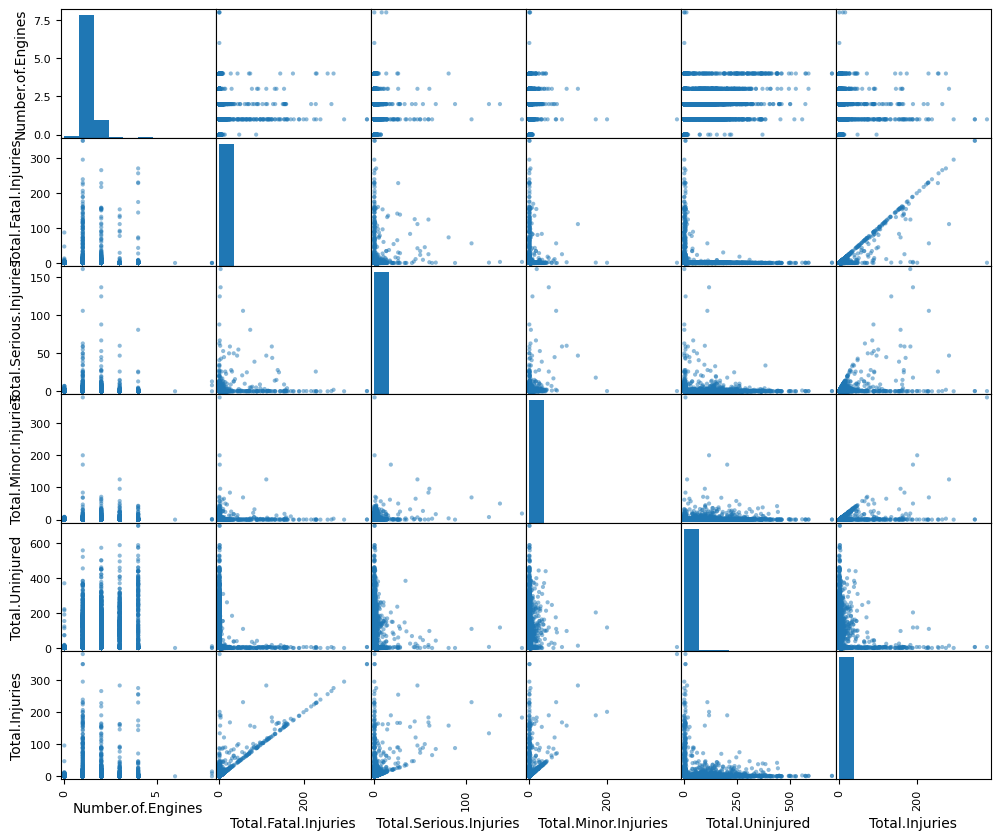

In [39]:
pd.plotting.scatter_matrix(df, figsize=(12,10));

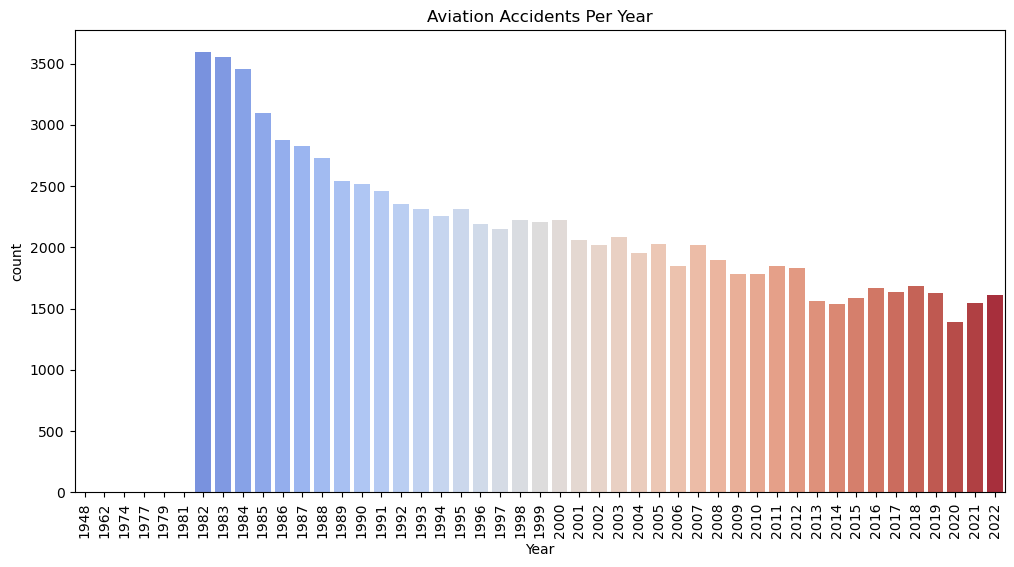

In [40]:
# This count plot visualizes the number of aviation accidents per year, helping us analyze trends over time.
# Plot number of accidents per year
df['Year'] = df['Event.Date'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Year'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Aviation Accidents Per Year')
plt.show()

**Analysis:**

The graph indicates a general decline in aviation accidents over the years. This could be attributed to advancements in technology, better safety regulations, and improved training for pilots and ground staff. However, certain years show spikes, possibly due to specific incidents or global aviation crises.

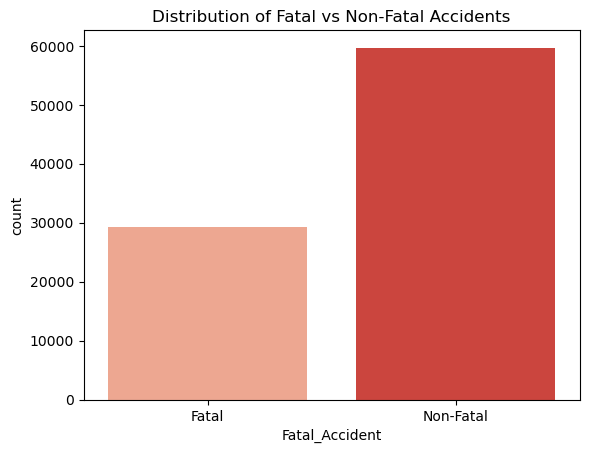

In [41]:
# This bar chart compares the frequency of fatal and non-fatal accidents, giving insight into accident severity.
sns.countplot(x=df['Fatal_Accident'], palette='Reds')
plt.title("Distribution of Fatal vs Non-Fatal Accidents")
plt.show()

**Analysis:**

The graph shows that **non-fatal accidents are more common than fatal ones**, twice as more.
This suggests that while aviation accidents occur, many do not result in complete loss of life, likely due to safety measures, emergency response effectiveness, and improvements in aircraft design.


### Bar graphs

In [43]:
df['Make'].nunique()

8237

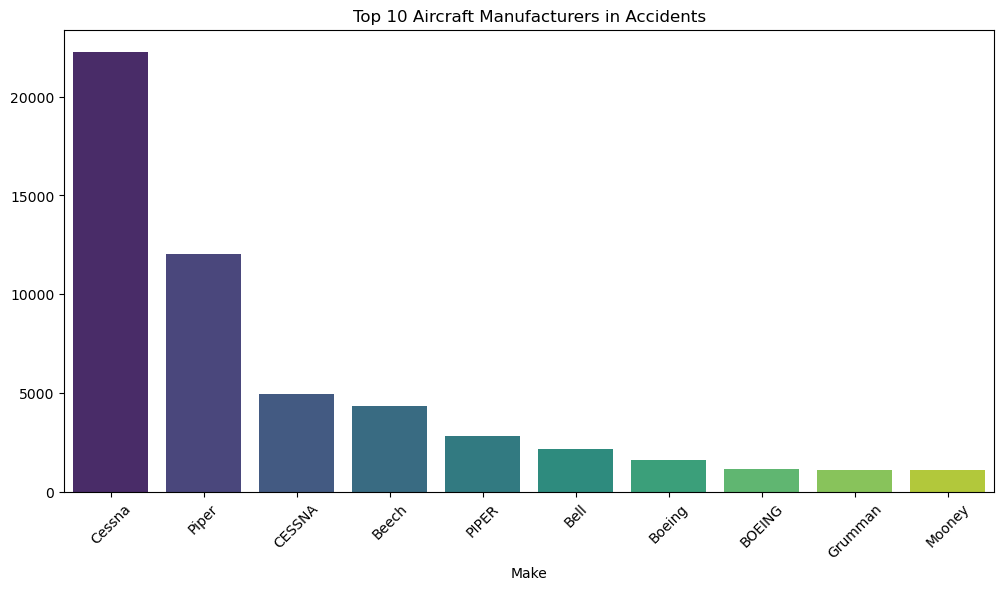

In [42]:
# This bar plot highlights the aircraft manufacturers most commonly involved in aviation accidents.
top_makes = df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Aircraft Manufacturers in Accidents')
plt.show()

**Analysis:**

Certain manufacturers appear more frequently in accidents, like Cessna, while other manufacturers appear less frequently such as Mooney

This could be due to their widespread use rather than inherent design flaws. Manufacturers producing a high number of commercial and general aviation aircraft naturally have higher accident counts.

*Further analysis would be needed to assess accident rates relative to the total number of aircraft produced by each manufacturer.*

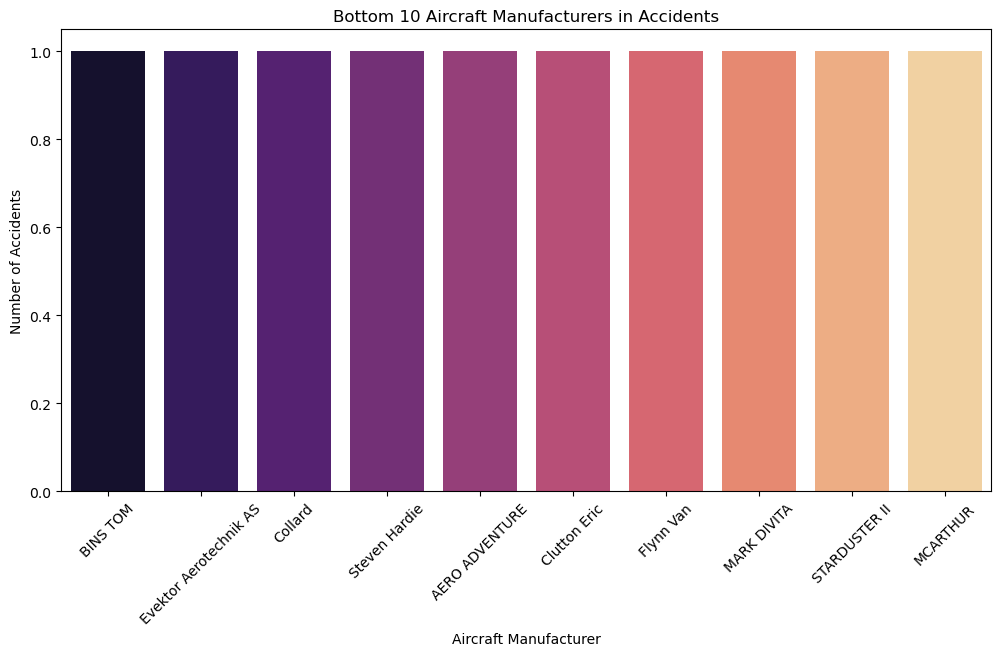

In [47]:
# Getting the 10 manufacturers with the least number of accidents
# This bar plot highlights the aircraft manufacturers least commonly involved in aviation accidents.
bottom_makes = df['Make'].value_counts().nsmallest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_makes.index, y=bottom_makes.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Bottom 10 Aircraft Manufacturers in Accidents')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Accidents')
plt.show()

**Analysis:**

The manufacturers with the least accidents, have **1.0** accident each.

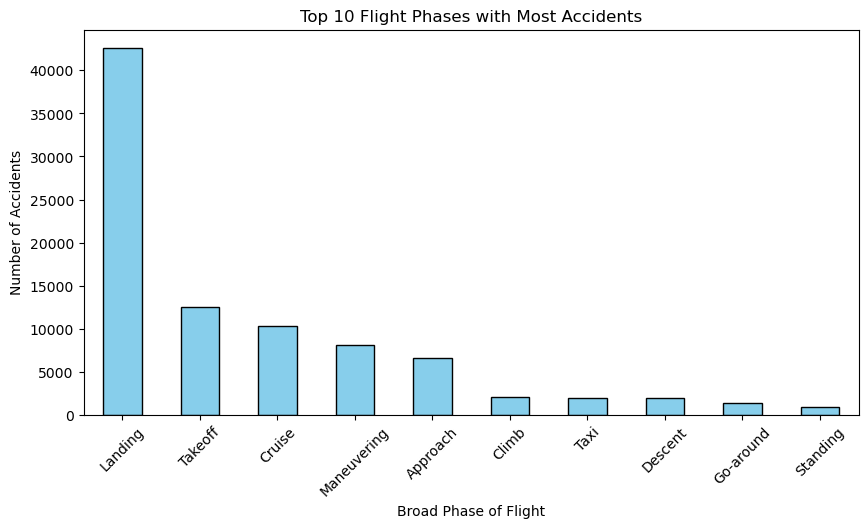

In [48]:
# This bar chart displays the most accident-prone flight phases
df['Broad.phase.of.flight'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')

plt.title('Top 10 Flight Phases with Most Accidents')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


**Analysis:**
The majority of accidents occur during landing followed by takeoff.

These phases involve significant changes in speed, altitude, and pilot input, making them more prone to errors and external factors such as weather conditions or mechanical failures.

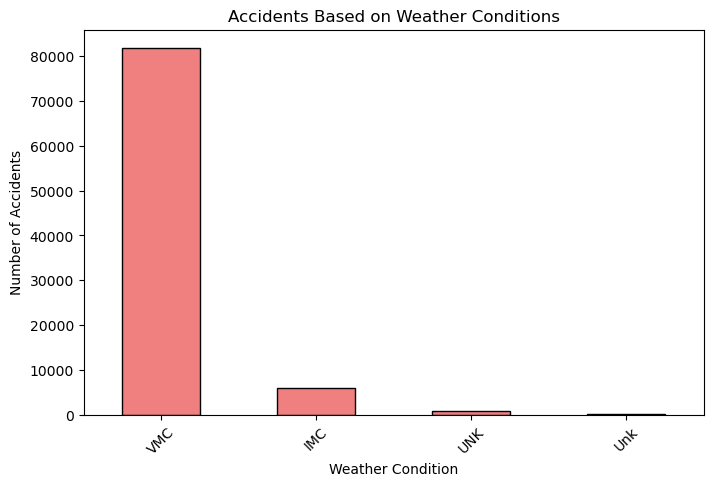

In [49]:
# This bar chart categorizes accidents by weather conditions
df['Weather.Condition'].value_counts().plot(kind='bar', figsize=(8, 5), color='lightcoral', edgecolor='black')

plt.title('Accidents Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


**Analysis:**
The majority of accidents occur under VMC - Visual Meteorological Conditions (clear weather), meaning that clear weather does not necessarily prevent accidents.

However, a significant number also occur under Instrument Meteorological Conditions (IMC), where pilots rely on instruments rather than visual cues. This suggests that while clear weather reduces risks, human errors and mechanical failures can still lead to accidents.

C:\Users\gichu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


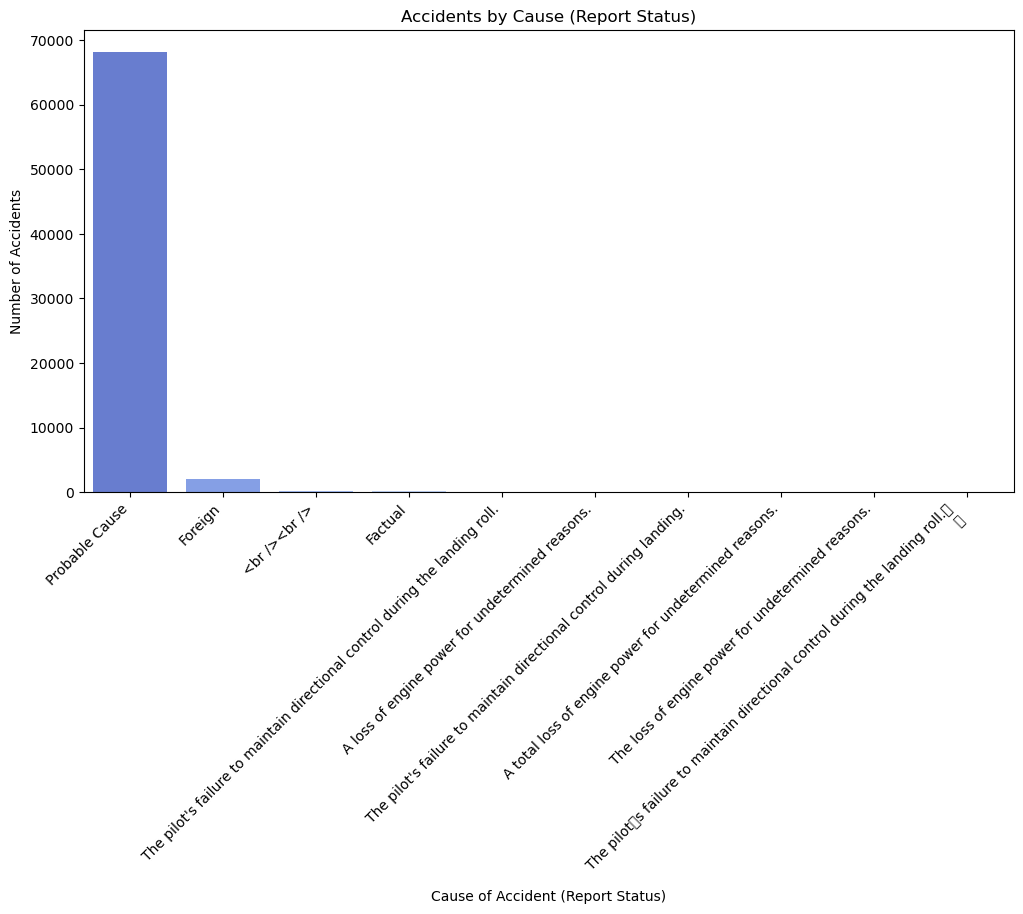

In [58]:
# This bar chart Count occurrences of different Report.Status categories
cause_counts = df['Report.Status'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='coolwarm')

plt.xlabel('Cause of Accident (Report Status)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Cause (Report Status)')
plt.xticks(rotation=45, ha='right')

plt.show()

In [53]:
print(df['Report.Status'].unique())

['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.']


In [56]:
categories = {
    "Pilot Error": ["pilot", "misjudgment", "control", "altitude", "navigation", "stall"],
    "Mechanical Failure": ["engine", "power loss", "malfunction", "failure"],
    "Weather": ["icing", "turbulence", "visibility", "wind", "storm"],
    "Operational Issues": ["runway", "collision", "incursion", "ATC error"]
}

category_counts = {cat: 0 for cat in categories}

for status in df['Report.Status'].dropna():
    for cat, keywords in categories.items():
        if any(word in status.lower() for word in keywords):
            category_counts[cat] += 1

print(category_counts)

{'Pilot Error': 14580, 'Mechanical Failure': 11987, 'Weather': 2730, 'Operational Issues': 2992}


C:\Users\gichu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


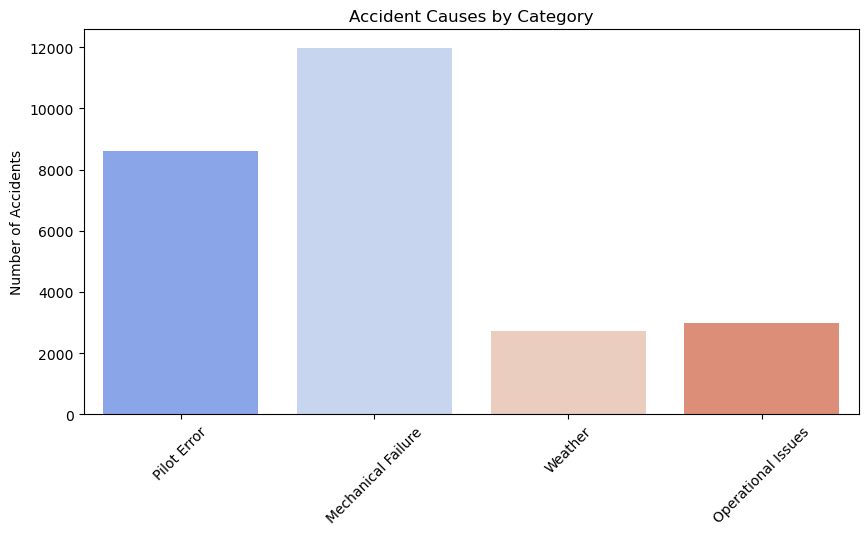

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="coolwarm")
plt.title("Accident Causes by Category")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

**Analysis**:
